<a href="https://colab.research.google.com/github/arj1211/msci446-practice/blob/main/msci446_tut1_dataExploration_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ## Acknowledgments 
> Tutorial adapted from: 
> * [Analyzing Cars.csv File in Python – A Complete Guide](https://www.askpython.com/python/examples/analyzing-cars-dataset-in-python)
> * [Exploring Data using Python](https://towardsdatascience.com/exploring-the-data-using-python-47c4bc7b8fa2)
>  
> Data taken from:
> * [Cars Data](https://www.kaggle.com/ljanjughazyan/cars1)  


> Note: You can get practice data sets from [Kaggle](https://www.kaggle.com), but you cannot use it for the project.

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Packages
In Python, we don't have libraries, we rather have packages.  

To help us with data exploration (and really all of data science), we will use the following packages:
* NumPy: efficient numeric manipulation
* Pandas: load and manipulate data frames
* Seaborn: data visualization (highly compatible with Pandas)
* MatPlotLib: basic data visualization (Seaborn is built on top of matplotlib)  

To load a package, you use the keyword `import`.

```Python
import pandas
```
I can also choose to rename the package when I import it so it is easier to use it in my code

```Python
import pandas as pd
```
I can choose to import a specific item (class, function, etc.) from a package

```Python
from pandas import DataFrame 
```

In [45]:
# import the libraries we will use
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# use color codes in the plots geenrated by seaborn
sns.set(color_codes=True)

# 1. Loading our dataset

In [46]:
import os
import io

fname = 'CARS.csv'
data_path = 'drive/MyDrive/Colab Notebooks/msci446-tutorial-data'

if fname not in os.listdir(data_path):
    # upload sample automobile data for exploration
    from google.colab import files 
    uploaded_files = files.upload() # upload file
    uploaded_files[fname]
    data = io.BytesIO(uploaded_files[fname]) # read file
    with open(os.path.join(data_path, fname), "wb") as f:
        f.write(data.getbuffer())

In [47]:
# load as a data frame

# if doing locally, simply pass the name of the file

# view the first 5 rows to get an initial idea of the columns
df = pd.read_csv(os.path.join(data_path, fname))
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451.0,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778.0,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230.0,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575.0,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880.0,115,197


In [48]:
# Getting the number of instances and features
df.shape

(428, 15)

In [49]:
# Getting the dimensions of the data frame
df.ndim

2

# Data Types I

Our utlimate goal (which we will not get to in this tutorial) is to predict the price of car given its other attributes.  

This is a supervised learning problem. And in the context of our data set, it means that:
* **Outcome**: MSRP (manufacturer's suggested retail price)
* **Predictor**: all other features/columns/variables

In [50]:
# get a quick feel for your data set (# rows and columns, null-values, data types)
# note: pandas views strings as objects. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    425 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       427 non-null    float64
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 50.3+ KB


In [51]:
# view summary/stats of each numeric variable/column
df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,425.000000,428.000000,428.000000,428.000000,427.000000,428.000000,428.000000
mean,3.196729,5.807059,215.885514,20.060748,26.843458,3578.166276,108.154206,186.362150
std,1.108595,1.560251,71.836032,5.238218,5.741201,759.860710,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3103.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3473.000000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3978.500000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


# Data Types II

## Numeric
* MSRP (but the `$` is causing a problem)
* Invoice (but the `$` is causing a problem)
* Engine Size
* Cylinders
* Horsepower
* etc.

## Categorical
* Make
* Model
* Type
* Origin
* Drive Train

## Boolean
* Let's make our own 

In [52]:
# a car is powerful if its horse power is over the 75th percentile
df['powerful'] = np.where(df['Horsepower'] > np.percentile(df['Horsepower'], 75), 'yes', 'no')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,powerful
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451.0,106,189,yes
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778.0,101,172,no
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230.0,105,183,no
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575.0,108,186,yes
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880.0,115,197,no


# 2. Removing irrelevant features
In this case, those are features that either provide redundant information (e.g., `Invoice`), or won't help us with prediction (e.g. `Origin`).

In [53]:
# a dataframe in pandas has 2 axes:
#   axis 0: rows
#   axis 1: columns
df.drop(columns=['Model', 'DriveTrain', 'Invoice', 'Origin', 'Type'], inplace=True)
df.head()

,Make,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,powerful
0,Acura,"$36,945",3.5,6.0,265,17,23,4451.0,106,189,yes
1,Acura,"$23,820",2.0,4.0,200,24,31,2778.0,101,172,no
2,Acura,"$26,990",2.4,4.0,200,22,29,3230.0,105,183,no
3,Acura,"$33,195",3.2,6.0,270,20,28,3575.0,108,186,yes
4,Acura,"$43,755",3.5,6.0,225,18,24,3880.0,115,197,no


# 3. Eliminating duplicates
It's very unlikely that two cars have the exact same price, so we will use `MSRP` as our duplication source of truth.

In [54]:
print("Count before Removing Duplicates: ")
df.count()

Count before Removing Duplicates: 


Make           428
MSRP           428
EngineSize     428
Cylinders      425
Horsepower     428
MPG_City       428
MPG_Highway    428
Weight         427
Wheelbase      428
Length         428
powerful       428
dtype: int64

In [55]:
# remove rows that have a duplicate MSRP
df.drop_duplicates('MSRP', inplace=True)
print("Count after Removing Duplicates: ")
df.shape

Count after Removing Duplicates: 


(410, 11)

# 4. Dealing with missing OR null values
Generally, we have 2 options:

## A: Fill in missing value with mean
* Advantage: keeps all the rows, which might be especially valuable if your data set is not that big
* Disadvantage: has "fabricated" data

## B: Drop row that has a missing values
* Advantage: all the data is true
* Disadvantage: must lose a lot of data, especially if there are lots of columns, which increases the chance of missing data

In [56]:
# Note: the original data had no missing values, but I deleted some on purpose 😅
print(df.isnull().sum())

Make           0
MSRP           0
EngineSize     0
Cylinders      3
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         1
Wheelbase      0
Length         0
powerful       0
dtype: int64


In [57]:
# Calculate mean of all the values of the column (Cylinders)
cylinders_mean = df['Cylinders'].mean()
print("The mean of Cylinders is: ", cylinders_mean)

cylinders_mean = round(cylinders_mean)
print("Rounded value of the mean of Cylinders is: ", cylinders_mean)
 
# Replace the null value with the mean of Cylinders
df['Cylinders'].fillna(cylinders_mean, inplace=True)

# For someone wondering about inplace = True: If it is True it the original 
# object is modified with this change. If it is False (default) the function 
# doesn't modify the original object, instead it returns a modified copy of it 
# and you have to assign it to the original object to replace it.

print(df.isnull().sum())
print()
print("Count:")
print(df.count())

The mean of Cylinders is:  5.823095823095823
Rounded value of the mean of Cylinders is:  6
Make           0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         1
Wheelbase      0
Length         0
powerful       0
dtype: int64

Count:
Make           410
MSRP           410
EngineSize     410
Cylinders      410
Horsepower     410
MPG_City       410
MPG_Highway    410
Weight         409
Wheelbase      410
Length         410
powerful       410
dtype: int64


In [58]:
print("Count before dropping:\n", df.count(), "\n", sep='')

# drop any row (axis 0) that has any type of null value
df.dropna(inplace=True)

print(df.isnull().sum(), "\n")
print("Count after dropping:\n", df.count(), sep='')

Count before dropping:
Make           410
MSRP           410
EngineSize     410
Cylinders      410
Horsepower     410
MPG_City       410
MPG_Highway    410
Weight         409
Wheelbase      410
Length         410
powerful       410
dtype: int64

Make           0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
powerful       0
dtype: int64 

Count after dropping:
Make           409
MSRP           409
EngineSize     409
Cylinders      409
Horsepower     409
MPG_City       409
MPG_Highway    409
Weight         409
Wheelbase      409
Length         409
powerful       409
dtype: int64


# 5. Converting object values to numeric
Since `MSRP` values start with `$`, Pandas does not recognize them as numbers. This means that we cannot plot it, and we cannot use linear regression, just to name a few disadvantages that come with the column not being recognized as a number.  
To fix this, we will remove the dollar sign and convert the column to become numberic.

In [59]:
import re
df['MSRP'] = df['MSRP'].apply(lambda x: int(''.join(re.findall('[0-9]+', x))))
df.head()

,Make,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,powerful
0,Acura,36945,3.5,6.0,265,17,23,4451.0,106,189,yes
1,Acura,23820,2.0,4.0,200,24,31,2778.0,101,172,no
2,Acura,26990,2.4,4.0,200,22,29,3230.0,105,183,no
3,Acura,33195,3.2,6.0,270,20,28,3575.0,108,186,yes
4,Acura,43755,3.5,6.0,225,18,24,3880.0,115,197,no


# 6. Detecting Outliers
Outliers can skew your data. Thus, it is usually a good idea to remove them. And if you have a very good reason against removing them, then you should at least know about them.

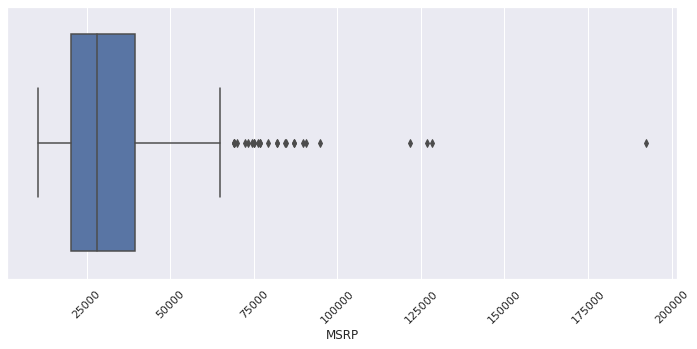

In [60]:
# visualize box plot based on main feature
plt.figure(figsize=(12,5))
sns.boxplot(x=df['MSRP'])
plt.xticks(rotation=45)
plt.show()

In [63]:
Q1 = df.quantile(1/4, numeric_only=True)
Q3 = df.quantile(3/4, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

MSRP           19145.0
EngineSize         1.6
Cylinders          2.0
Horsepower        85.0
MPG_City           4.0
MPG_Highway        5.0
Weight           876.0
Wheelbase          9.0
Length            16.0
dtype: float64


In [64]:
# remove all points that are either:
#   - less than 1.5*IQR under Q1 OR 
#   - more than 1.5*IQR above Q3
df1 = df[ ~ ( (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)) ).any(axis=1)]

<ipython-input-64-cf067f185218>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df[ ~ ( (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)) ).any(axis=1)]


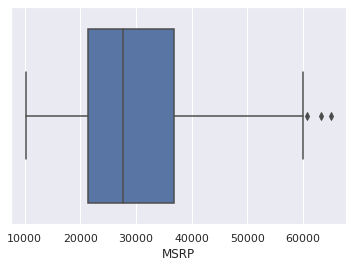

In [65]:
sns.boxplot(x=df1['MSRP'])
plt.show() # note: this makes it cleaner

# 7. Visualizing Correlation between Variables

## 7.1 Correlation between all numeric values

A heat map can be useful if you want to find your dependent variable (a.k.a. the outcome). It shows the correlation between all variables in the data set.  
I can then use the realted features to build my model.

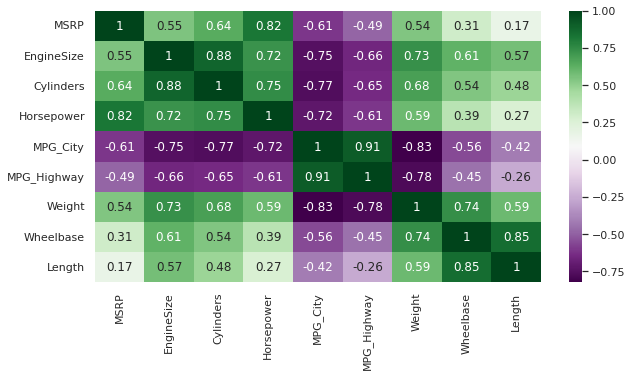

In [69]:
plt.figure(figsize=(10,5))
c = df1.corr()
sns.heatmap(c, annot=True, cmap='PRGn')
plt.show()

## 7.2 Correlation between a pair of variables
I see that `MSRP` and `Horsepower` have a very high correlation of `0.82`.  
Naturally, I wanna take a closer look at their relationship and try to recognize its shape/degree.  
I can do this using a scatter plot.

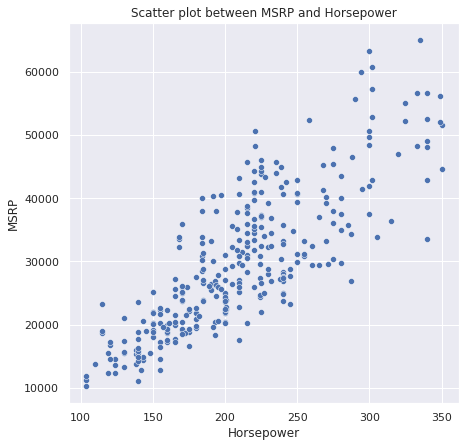

In [78]:
fig, ax = plt.subplots(figsize=(7,7))
# ax.scatter(df1['Horsepower'], df1['MSRP'])
sns.scatterplot(data=df1, x='Horsepower', y='MSRP')
plt.title('Scatter plot between MSRP and Horsepower')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MSRP')
plt.show()

# 👩‍🎓👨‍🎓 I wanna learn more

* [10 mins to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#object-creation)
* [NumPy: the absolute basics for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html)
* [An introduction to seaborn](https://seaborn.pydata.org/introduction.html)
* [Python Numpy Tutorial with Jupyter and Colab_Stanford CS231n](https://cs231n.github.io/python-numpy-tutorial/)
